# Visualize the dataset

In [32]:
# Import packages
from tqdm import tqdm
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import plotly.express as px
# !{sys.executable} -m pip install plotly

In [33]:
df = pd.read_csv('data/raw_data/combined.csv',delimiter=",")
print(df.shape)

(82076, 6)


## Statistics

In [34]:
# Na-values
df.isna().sum()

id                0
country           0
name              0
NACE           5997
description    1822
text              4
dtype: int64

In [35]:
# Different countries
df['country'].unique()

array(['SE', 'DK', 'FI', 'NO', 'US', 'JP', 'CN', 'AU', 'GB', 'BM', 'CA',
       'AT', 'LU', 'IN', 'FR', 'IT', 'SG', 'JE', 'ID', 'TR', 'PL', 'TH',
       'BR', 'DE', 'IL', 'HK', 'CH', 'NZ', 'MX', 'BE', 'RU', 'IM', 'PT',
       'KR', 'MY', 'NL', 'ES', 'KY', 'EE', 'PA', 'IE', 'ZA', 'PH', 'VG',
       'GR', 'HU', 'LT', 'GG'], dtype=object)

In [36]:
# Duplicate IDs
len(df) - len(df.drop_duplicates(subset=['id'],keep='first'))

1130

## Countries

SE    46012
DK    28738
NO     3694
FI     2583
US      230
CA      148
JP      104
CN       97
IN       79
AU       76
GB       48
TH       34
HK       23
DE       22
ID       20
SG       20
FR       16
IL       15
PL       13
TR       10
CH        9
BR        8
BE        8
IT        7
RU        7
NL        6
ZA        6
MX        5
ES        3
MY        3
AT        3
BM        3
IE        3
PT        3
JE        2
GR        2
PH        2
KR        2
NZ        2
LU        2
EE        1
PA        1
KY        1
IM        1
VG        1
HU        1
LT        1
GG        1
Name: country, dtype: int64


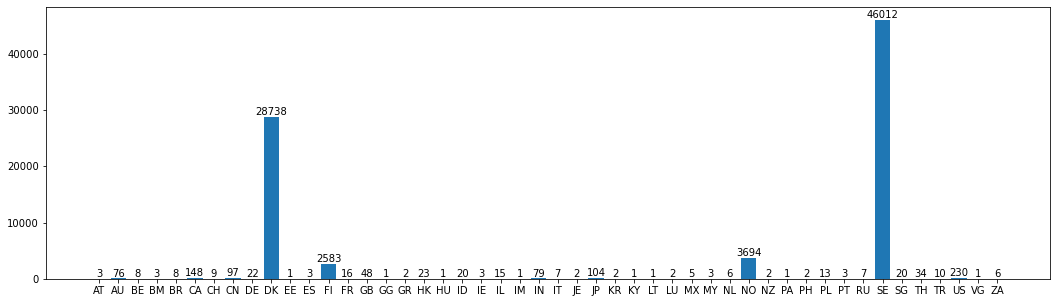

In [48]:

pivot = df['country'].astype(str).value_counts()
print(pivot)

a = sorted(zip(pivot.index,pivot.values))

f, ax = plt.subplots(figsize=(18,5))
plt.bar(list(zip(*a))[0],list(zip(*a))[1])

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

### Outside / in europe

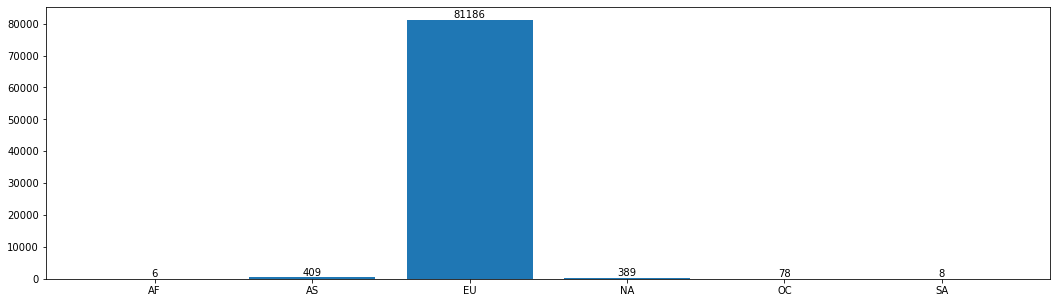

In [47]:
import json
f = open('util/continent_codes.json')
continent_codes = json.load(f)

continents = [continent_codes[c] for c in df['country']]
df['continent'] = continents

pivot = df['continent'].astype(str).value_counts()

a = sorted(zip(pivot.index,pivot.values))

f, ax = plt.subplots(figsize=(18,5))
plt.bar(list(zip(*a))[0],list(zip(*a))[1])

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()


## Visualize word and character count of the text

In [24]:
def wordCount(text, max_words = np.inf):
    num = len(str(text).split())
    return max_words if num > max_words else num

def charCount(text, max_chars = np.inf):
    num = len(str(text))
    return max_chars if num > max_chars else num

def countWordsAndCharacters(dataf, max_words = np.inf, max_chars = np.inf):
    wc = []
    cc = []
    for _, row in dataf.iterrows():
        wc.append(wordCount(row['description'], max_words))
        cc.append(charCount(row['description'], max_chars))
    return (wc,cc)


In [49]:
# Get median and mean of the number of words and characters
wc,cc = countWordsAndCharacters(df)

print("Num words has mean: {:.2f} and median: {:.0f} with std {:.2f}".format(np.mean(wc),np.median(wc),np.std(wc)))
print("Num chars has mean: {:.2f} and median: {:.0f} with std {:.2f}".format(np.mean(cc),np.median(cc),np.std(cc)))
print(f"Words - min: {min(wc)}, max:{max(wc)}")
print(f"Chars - min: {min(cc)}, max:{max(cc)}")

Num words has mean: 22.94 and median: 19 with std 34.06
Num chars has mean: 159.38 and median: 129 with std 232.72
Words - min: 1, max:3170
Chars - min: 1, max:24232


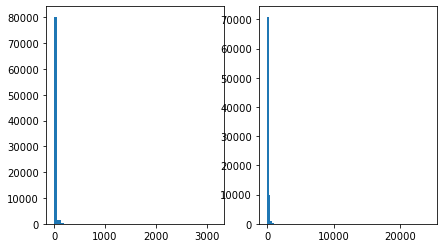

In [51]:
# With no max cap
wc,cc = countWordsAndCharacters(df)

fig, axs = plt.subplots(1,2,figsize=(7,4))
axs[0].hist(wc, bins=50)
axs[1].hist(cc, bins=100)

plt.show()

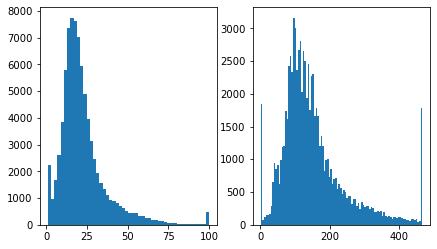

In [53]:
# With a max word cap of 100 and max chars at 1000
wc,cc = countWordsAndCharacters(dataf=df, max_words=100, max_chars=2*232.72)

fig, axs = plt.subplots(1,2,figsize=(7,4))
axs[0].hist(wc, bins=50)
axs[1].hist(cc, bins=100)
plt.show()

In [67]:
# How many words will be removed because they have more than 100 words
wc = np.array(wc)
len(wc[wc == 100])

477

## NACE codes

6    25076
4    19420
7    13240
n     5997
8     4933
5     4614
2     2812
9     2498
1     1906
3     1580
Name: NACE, dtype: int64


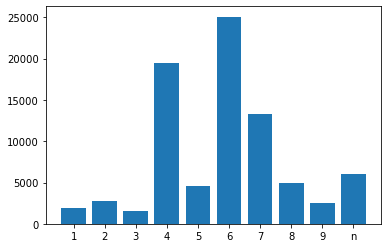

In [68]:
# Get how many companies have the same first number of NACE code, n=NaN
pivot = df['NACE'].astype(str).str[0].value_counts()
print(pivot)

a = sorted(zip(pivot.index,pivot.values))
plt.bar(list(zip(*a))[0],list(zip(*a))[1])
plt.show()

64    11242
68     6562
na     5997
70     5862
43     5307
      ...  
36       22
39       13
99        7
19        6
89        5
Name: NACE, Length: 81, dtype: int64


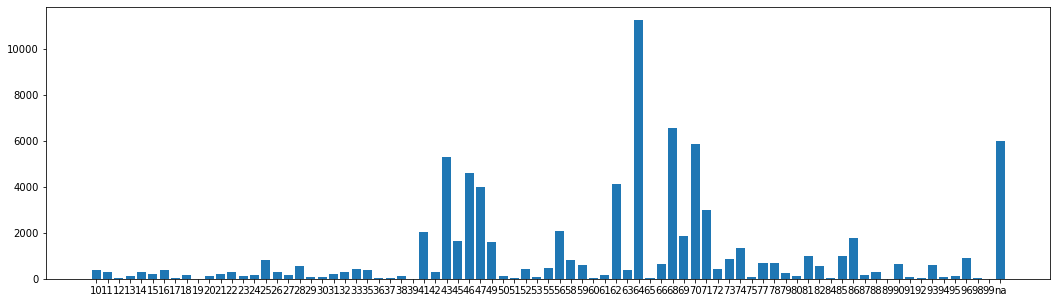

In [74]:
# Get how many companies have the same first TWO numbers of NACE code, n=NaN
pivot = df['NACE'].astype(str).str[:2].value_counts()
print(pivot)

f, ax = plt.subplots(figsize=(18,5))
a = sorted(zip(pivot.index,pivot.values))
plt.bar(list(zip(*a))[0],list(zip(*a))[1])
plt.show()

In [31]:
# Get how many companies have the same number of digits in their NACE code
pivot = list(df['NACE'].astype(str).str.len())

keys = set(pivot)
unique = dict(zip(keys, [0]*len(keys)))

for i in pivot:
    unique[i] += 1

# Nan values have length 3, others are on the format: '7022.0', '210.0'
print(unique)

{3: 5997, 5: 1355, 6: 74724}
